# Loan Prediction

In [28]:
# Importation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [29]:
# Load Data
data = pd.read_csv("./Data/train.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Preprocessing

In [30]:
# Data Overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [31]:
data.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [32]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
# Splitting the data into numerical and categorical data
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [34]:
# Fill categorical missing data
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [35]:
# Drop Load_Id
cat_data = cat_data.drop('Loan_ID', axis=1)

In [36]:
# Fill numerical missing data with previous value
num_data = num_data.fillna(method='bfill')
num_data.isnull().sum().any()

C:\Users\Kahla\AppData\Local\Temp\ipykernel_13676\334950466.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data = num_data.fillna(method='bfill')


False

In [37]:
# Loan Status to numerical
target_value = {'Y':1,'N':0}
target = cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target = target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [38]:
# Encoding Categorical Data
le = LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [39]:
# Concatenate the data
data = pd.concat([cat_data,num_data,target],axis=1)
X = pd.concat([cat_data,num_data],axis=1)
y = target

## Visualization

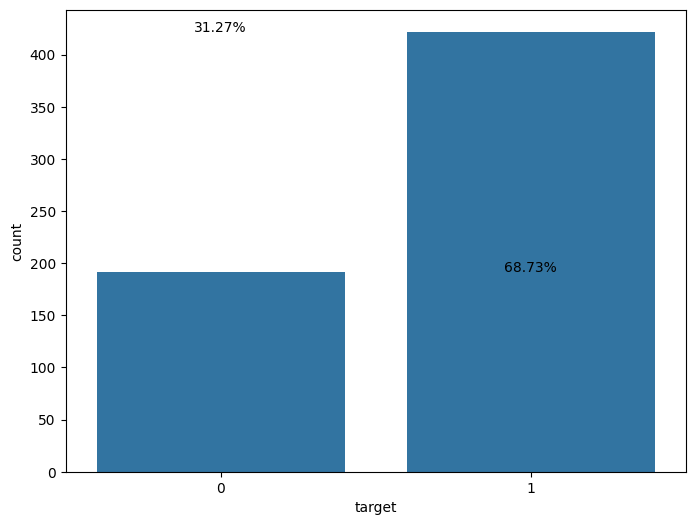

In [40]:
# Visualisation of the target
counts = target.value_counts()
percentages = counts / len(target) * 100

# Create a DataFrame from the target Series
df_target = pd.DataFrame({'target': target})

plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_target)

for i, count in enumerate(counts):
    plt.text(i, count, f'{percentages[i]:.2f}%', ha='center')

plt.show()

1. **Loan Approval Rate**: The plot shows that 68.73% of the applicants (target = 1) had their loans approved, while 31.27% of the applicants (target = 0) did not receive loan approval.

2. **Dominant Class**: The majority of the applicants in this dataset received loan approval, as indicated by the higher count of target = 1 compared to target = 0.


C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

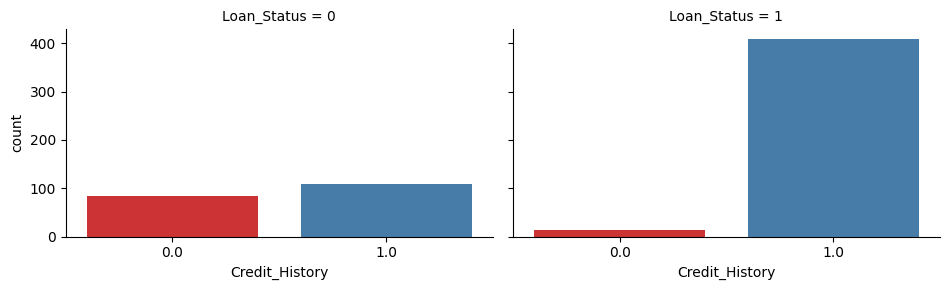

In [41]:
# Credit_History vs Loan_Status
grid = sns.FacetGrid(data, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Credit_History', palette='Set1')

### Impact of Credit History

- **Having a positive credit history (1.0) greatly increases the likelihood of loan approval.** This is evident from the high count of approved loans (Loan_Status = 1) among applicants with Credit_History = 1.0.
- **Conversely, having no credit history (0.0) significantly reduces the chances of loan approval.** Very few applicants with Credit_History = 0.0 had their loans approved.

### Rejection Rate

- Both applicants with and without a credit history face rejections, but those with no credit history (0.0) have a slightly higher rejection rate compared to those with a positive credit history (1.0).

### Conclusion

Credit history is a crucial factor in the loan approval process. Applicants with a positive credit history are far more likely to get their loans approved compared to those without any credit history. This analysis suggests that credit history plays a significant role in the loan approval decision-making process.


C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

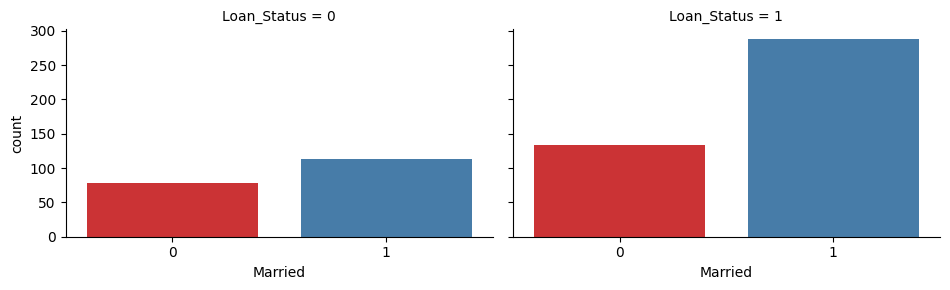

In [42]:
# Married vs Loan_Status
grid = sns.FacetGrid(data, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot, 'Married', palette='Set1')

### Marital Status Impact on Loan Approval

1. **Loan Approval Count**: 
   - Married individuals (Married = 1) have a higher count of loan approvals (Loan_Status = 1) compared to unmarried individuals (Married = 0).
   - There is a significant increase in the number of approved loans for married individuals.

2. **Loan Denial Count**:
   - For denied loans (Loan_Status = 0), there are fewer unmarried individuals than married ones.

3. **Graph Interpretation**:
   - The bar graph compares the count of approved and denied loans based on marital status.
   - The y-axis represents the count of loans.
   - The x-axis represents the marital status of the applicants.

### Conclusion

This analysis suggests that being married may positively influence the likelihood of loan approval.


C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

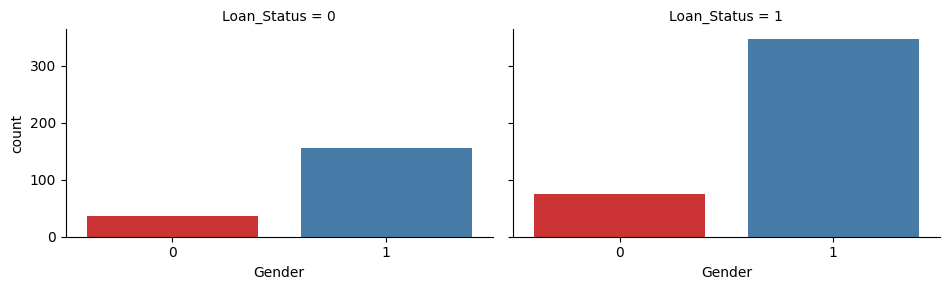

In [43]:
# Sexe vs Loan_Status
grid = sns.FacetGrid(data, col='Loan_Status', aspect=1.6)
grid.map(sns.countplot,'Gender', palette='Set1')

1. **Gender and Loan Status**: The plot shows that both male (Gender = 1) and female (Gender = 0) applicants have higher loan approval rates (Loan_Status = 1) compared to their rejection rates (Loan_Status = 0). However, male applicants are approved at a significantly higher rate than female applicants.

2. **Loan Rejections by Gender**: Among those who were not approved for loans (Loan_Status = 0), there are more male applicants (Gender = 1) compared to female applicants (Gender = 0), indicating that although males apply and get approved more frequently, they also face more rejections in absolute terms.

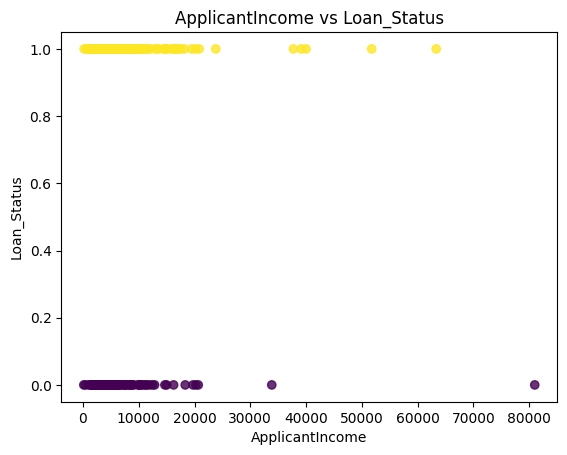

In [44]:
# ApplicantIncome vs Loan_Status
plt.scatter(data['ApplicantIncome'], data['Loan_Status'], alpha=0.8, c=data['Loan_Status'])
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.title('ApplicantIncome vs Loan_Status')
plt.show()

### Income Distribution and Loan Approval Analysis

1. **Income Distribution**:
   - Most applicants have an income at the lower end of the scale, with a concentration of data points below 2000,0.

2. **Loan Approval**:
   - Both low and high-income applicants have a mix of loan statuses, indicating that income alone does not determine loan approval.

3. **Data Spread**:
   - There is a sparse distribution of applicants with higher incomes, suggesting fewer applicants in that range or less data collected.

4. **Binary Status**:
   - Loan_Status is binary, with 0.0 likely representing denied loans and 1.0 representing approved loans.

### Conclusion

This analysis suggests that while ApplicantIncome is a factor, it is not the sole determinant of Loan_Status. Other factors may also play a significant role in the loan approval process.

In [45]:
data.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


### Overall Conclusion

The key differentiator between approved and denied loans appears to be the coapplicant income, with approved loans having a significantly higher median coapplicant income.

Other factors like gender, marital status, dependents, education, self-employment status, property area, applicant income, loan amount, loan term, and credit history have similar median values for both approved and denied loans, indicating these factors alone may not be strong determinants of loan approval.

In [46]:
# Split Data into Train and Test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [47]:
# Logistic Regression, KNN, Decision Tree
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [48]:
# Precision of the models
def accuracy(y_true,y_pred,return_score=False):
    acc = accuracy_score(y_true,y_pred)
    if return_score:
        return acc
    else:
        print(f'Accuracy: {acc}')

In [49]:
# Models Application & Evalusation Function
def apply_model(models,X_train,y_train,X_test,y_test):
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print(name)
        accuracy(y_test,y_pred)
        print('-'*30)

In [50]:
# Apply Models
apply_model(models,X_train,y_train,X_test,y_test)

Logistic Regression
Accuracy: 0.8536585365853658
------------------------------
KNN
Accuracy: 0.6504065040650406
------------------------------
Decision Tree
Accuracy: 0.8455284552845529
------------------------------


C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
# Features to be used
features = X[['Credit_History','Married','CoapplicantIncome','LoanAmount']]

In [58]:
# Split Data into Train and Test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(features, y):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [54]:
# Apply Models
apply_model(models,X_train,y_train,X_test,y_test)

Logistic Regression
Accuracy: 0.8536585365853658
------------------------------
KNN
Accuracy: 0.6585365853658537
------------------------------
Decision Tree
Accuracy: 0.8455284552845529
------------------------------


C:\Users\Kahla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
# Apply Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(features,y)

LogisticRegression(random_state=42)

In [60]:
# Save the model
pickle.dump(model, open('model.pkl','wb'))